# <center> Topic 1. Exploratory data analysis with Pandas

<img align="center" src="https://habrastorage.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg"  width=50% />

## Article outline
1. [Demonstration of main Pandas methods](#1.-Demonstration-of-main-Pandas-methods)
2. [First attempt at predicting telecom churn](#2.-First-attempt-at-predicting-telecom-churn)
3. [Assignments](#3.-Assignments)
4. [Useful resources](#4.-Useful-resources)

## 1. Demonstration of main Pandas methods
Well... There are dozens of cool tutorials on Pandas and visual data analysis. If you are already familiar with these topics, you can wait for the 3rd article in the series, where we get into machine learning.  

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. 

In [101]:
import numpy as np
import pandas as pd


https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

We'll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let's read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [102]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Let’s have a look at data dimensionality, feature names, and feature types.

In [103]:
print(df.shape)

(3333, 20)


From the output, we can see that the table contains 3333 rows and 20 columns.

Now let's try printing out column names using `columns`:

In [104]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


We can use the `info()` method to output some general information about the dataframe: 

In [105]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [106]:
df["Churn"].describe()

count      3333
unique        2
top       False
freq       2850
Name: Churn, dtype: object

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

We can **change the column type** with the `astype` method. Let's apply this method to the `Churn` feature to convert it into `int64`:

In [107]:
df["Churn"] = df["Churn"].astype("int64")

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [108]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [109]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's have a look at the distribution of `Churn`:

In [110]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

2850 users out of 3333 are *loyal*; their `Churn` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [111]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [112]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


We can also sort by multiple columns:

In [113]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**

In [114]:
df["Churn"].mean()

np.float64(0.14491449144914492)

In [115]:
df[df["Churn"] == 1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1


14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**What are average values of numerical features for churned users?**

In [116]:
df[df["Churn"] == 1].mean(numeric_only = True)

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [117]:
df[df["Churn"] == 1]["Total day minutes"].mean()

np.float64(206.91407867494823)


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [118]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

np.float64(18.9)

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).

In [119]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [120]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [121]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [122]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with W, we can do it like this:

In [123]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [124]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The same thing can be done with the `replace` method:

In [125]:
df = df.replace({"Voice mail plan": d})
df.head()

/tmp/ipykernel_159803/1212166602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Voice mail plan": d})


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0



### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [126]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].mean()

,Total day minutes,Total eve minutes,Total night minutes
Churn,,,
0,175.175754,199.043298,200.133193
1,206.914079,212.410145,205.231677


Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [127]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg(["mean", "std", "min", "max"])

Total day minutes                        Total eve minutes             \
                   mean        std  min    max              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
        min    max                mean        std   min    max  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:



In [128]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [129]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let's take a look at the average number of day, evening, and night calls by area code:

In [130]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190



### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let's create the `total_calls` Series and paste it into the DataFrame:



In [131]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


It is possible to add a column more easily without creating an intermediate Series instance:

In [132]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [133]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. First attempt at predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We'll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn` (however, visual analysis will be covered more thoroughly in the next article).


In [134]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [135]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

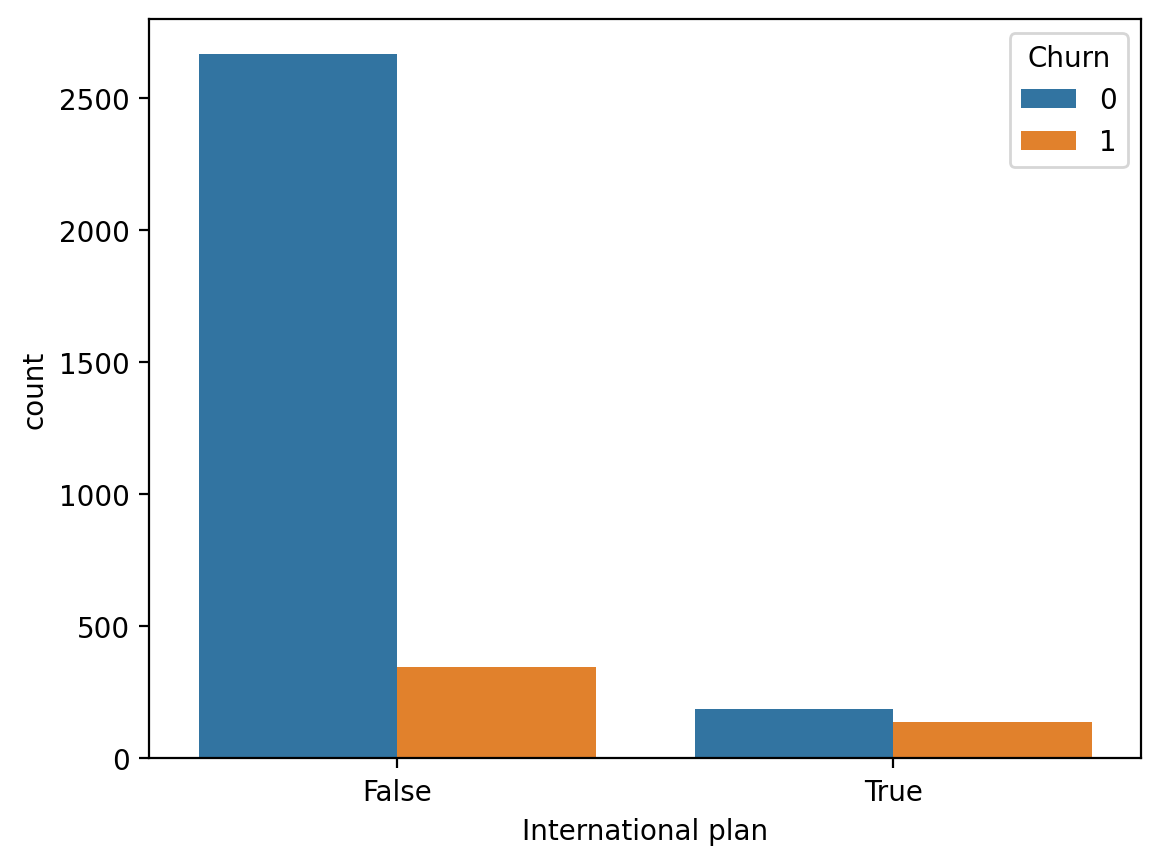

In [136]:
sns.countplot(x="International plan", hue="Churn", data=df);


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – *Customer service calls*. Let's also make a summary table and a picture.

In [137]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


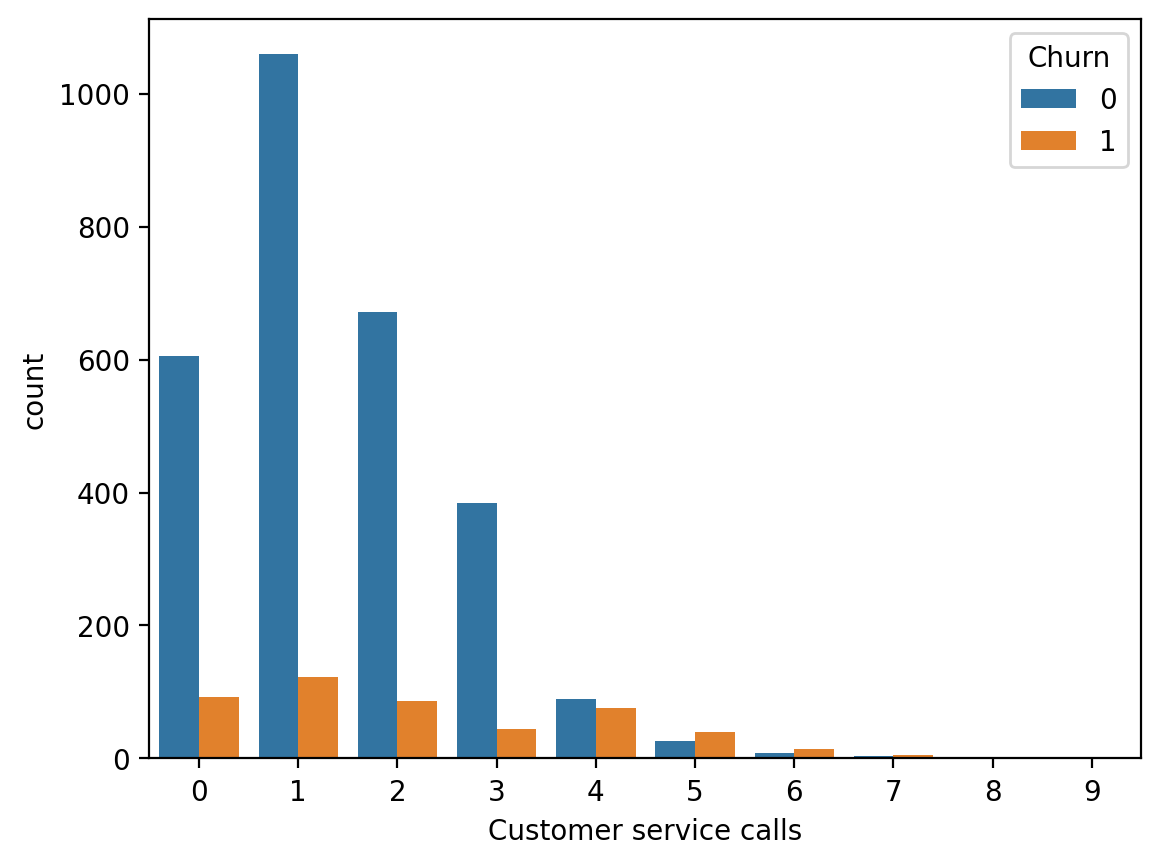

In [138]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn. 

In [139]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


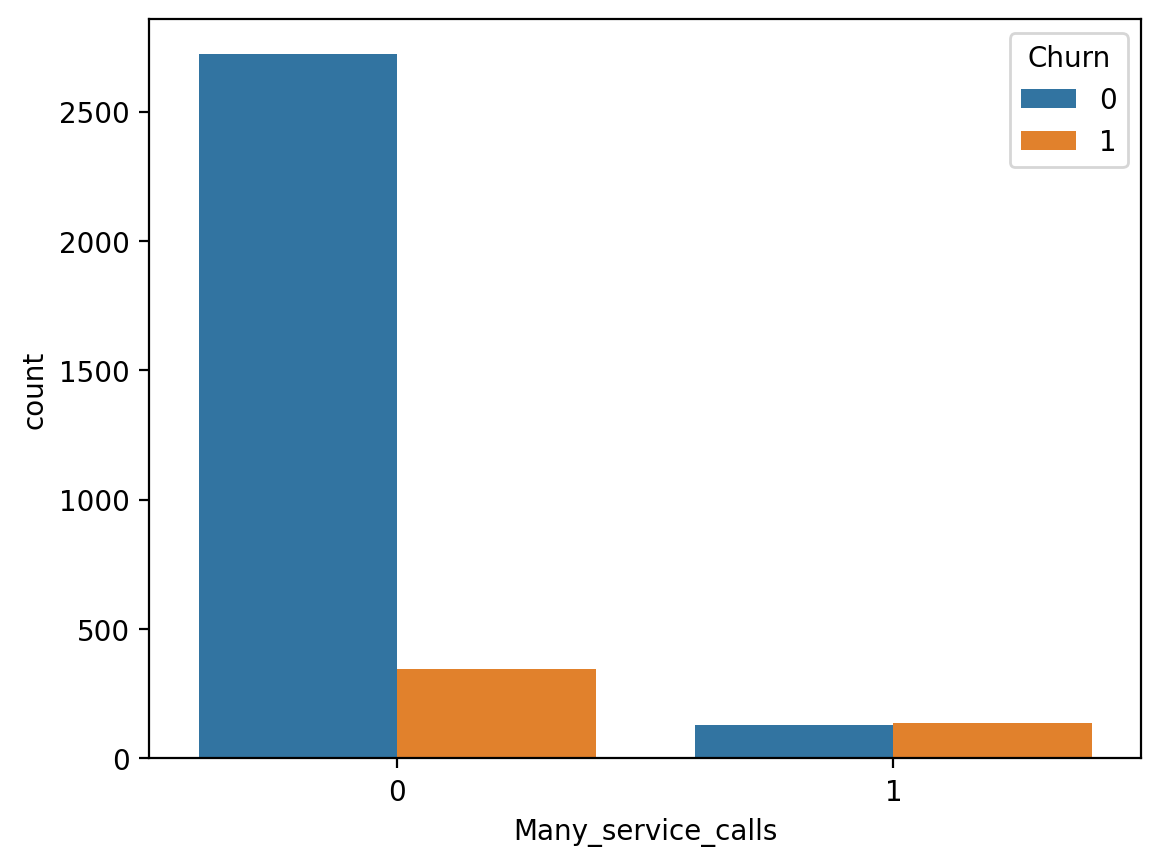

In [140]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);

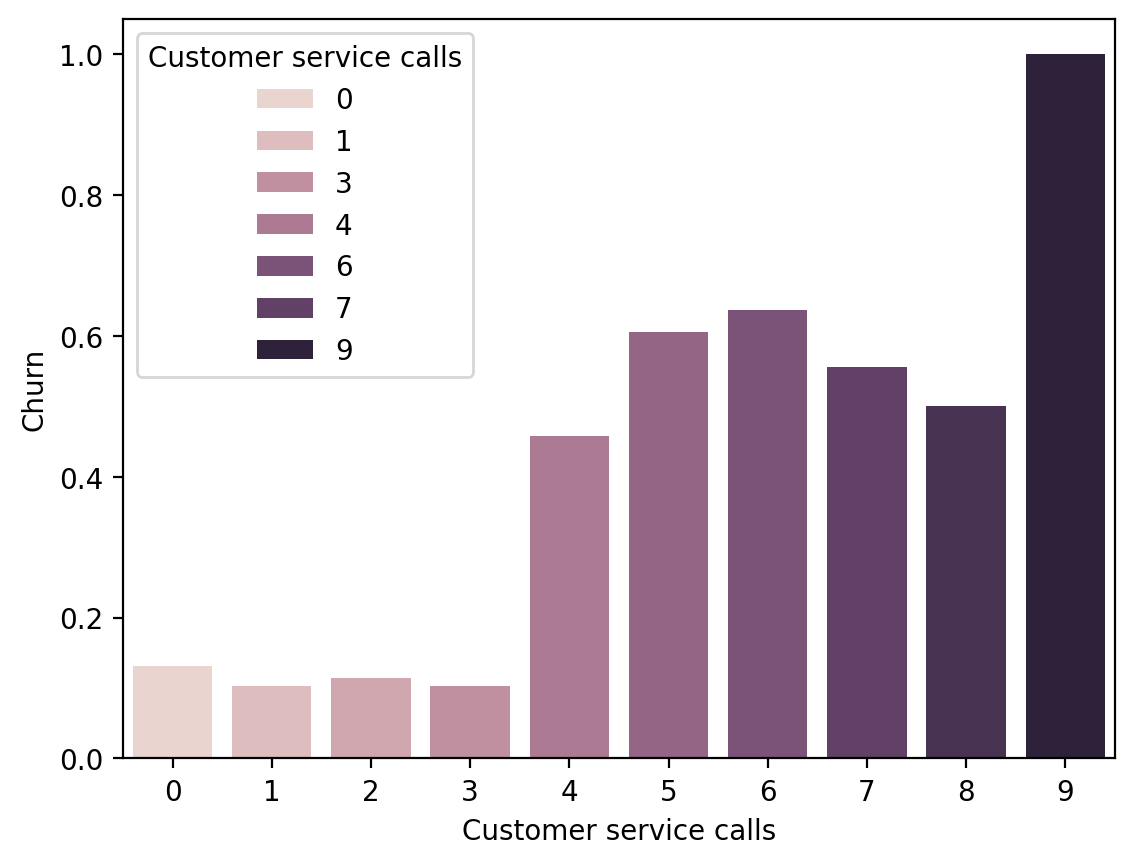

In [166]:
sns.barplot(x="Customer service calls", y="Churn", hue= "Customer service calls", data=df, errorbar=None);


Let's construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.



In [141]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"])

Churn,0,1
row_0,,
False,2841,464
True,9,19


# ✨ Exercise Time ✨

---

> The following section contains exercises to practice the concepts you've just learned. Take your time and explore the tasks!

---

<center><strong>⬇️ Exercises Begin Here ⬇️</strong></center>


# Exercise: Analyzing Housing Data

In this exercise, you will explore the housing dataset to uncover insights into the factors influencing house prices. Follow the instructions and hints provided below for each task.

---

### 1. **Data Overview**

**Task**: Start by loading the housing dataset and inspecting its structure.

**Instructions**:
- Load the dataset using `pd.read_csv()`.
- Display basic information about the dataset using `.info()`.
- Check for missing values using `.isnull().sum()`.

**Tip**: This step is crucial to understand the dataset and prepare it for further analysis.

---

### 2. **Filtering Data**

**Task**: Filter the data to find houses that meet the following conditions:
   - Have more than 3 stories.
   - Are located on a main road.
   - Have air conditioning.

**Instructions**:
- Use boolean indexing to filter rows that match the criteria.
- Return the filtered DataFrame and count how many houses meet the conditions.

**Tip**: You can chain multiple conditions together using `&` for "and" logic or `|` for "or" logic.

---

### 3. **Price vs. Area**

**Task**: Create a scatter plot to show the relationship between the size of the house (area) and the price.

**Instructions**:
- Use seaborn to create the scatter plot.
- Plot `area` on the x-axis and `price` on the y-axis.

**Tip**: Scatter plots are a great way to see if there’s any correlation between two continuous variables.

**Reflection**: What trends do you observe? Does a larger area always lead to a higher price?

---

### 4. **Average Price by Furnishing Status**

**Task**: Calculate the average price of houses based on their furnishing status (furnished, semi-furnished, unfurnished).

**Instructions**:
- Use the `.groupby()` function to group by `furnishingstatus` and calculate the mean price for each group.

**Tip**: Grouping the data allows you to calculate aggregate statistics for each category.

**Reflection**: Which furnishing status has the highest average price?

---

### 5. **Grouping by Number of Bedrooms**

**Task**: Group the houses by the number of bedrooms and calculate the average price for each group. Display the results in a bar chart.

**Instructions**:
- Plot the results in a bar chart using `matplotlib` or `seaborn`.

**Tip**: Bar charts are useful for comparing categorical data such as the number of bedrooms.

**Reflection**: Do houses with more bedrooms generally have higher prices?


Enjoy your exploration of the housing data! Remember to apply all the techniques you've learned and reflect on the results you obtain.
"""

In [1]:
import pandas as pd

In [7]:
housing_df = pd.read_csv("Housing.csv")

In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [142]:
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [10]:
housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [155]:
housing_df["stories"].count()

np.int64(545)

In [29]:
housing_filter  = (housing_df["stories"] > 3)  & (housing_df["mainroad"] == 1) & (housing_df["airconditioning"] == 1)

In [32]:
housing_filter.sum()

np.int64(33)

In [156]:
housing_filter

0      False
1       True
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

<Axes: xlabel='bedrooms', ylabel='price'>

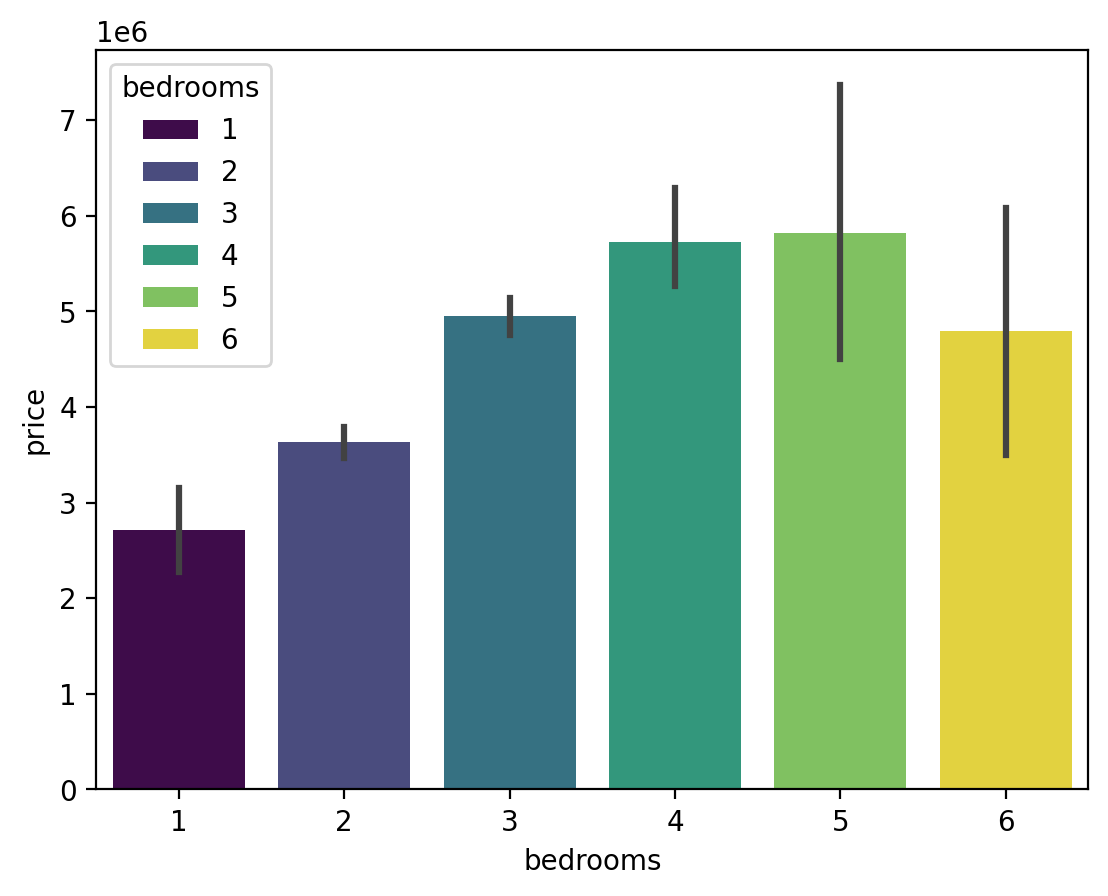

In [157]:
sns.barplot(x='bedrooms', y='price', data=housing_df, palette='viridis', hue='bedrooms')


In [35]:
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<Axes: xlabel='price', ylabel='area'>

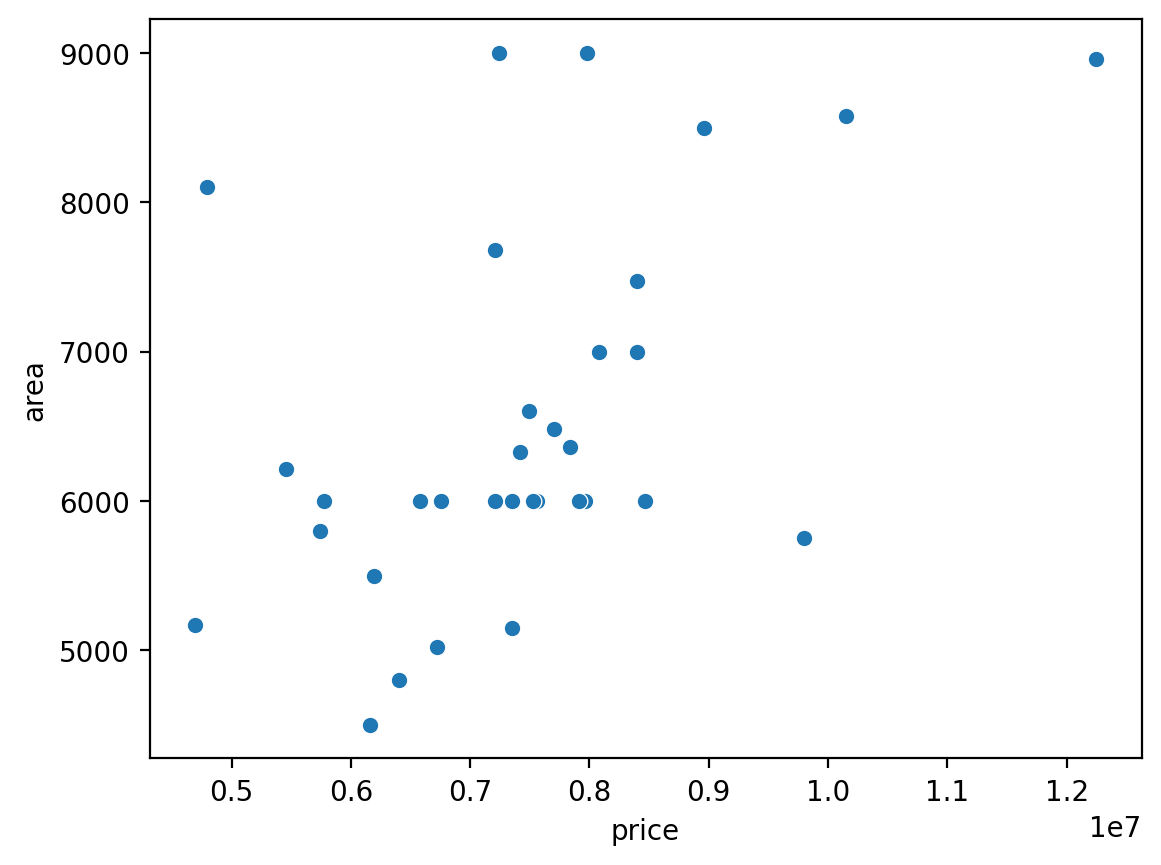

In [41]:
sns.scatterplot(housing_filter_df, x="price", y = "area")

<Axes: xlabel='area', ylabel='price'>

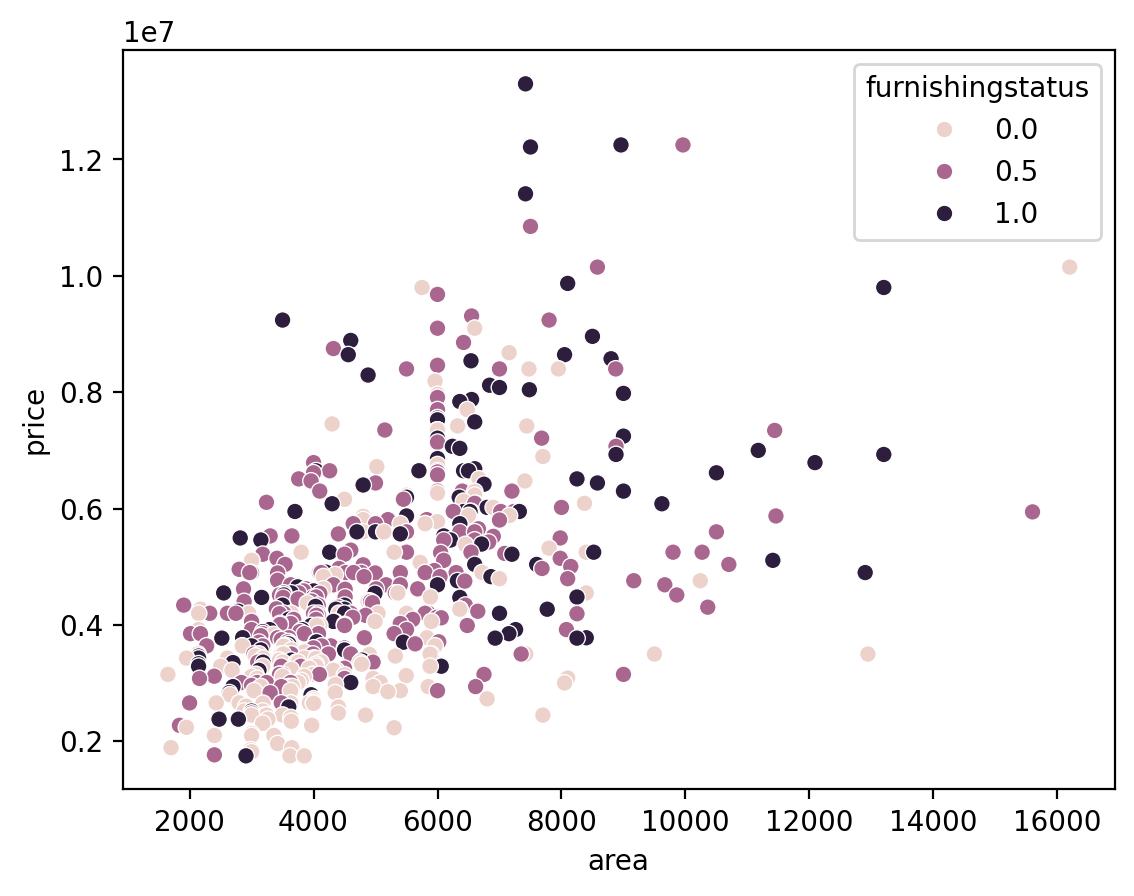

In [44]:
sns.scatterplot(housing_df, y="price", x = "area", hue="furnishingstatus")

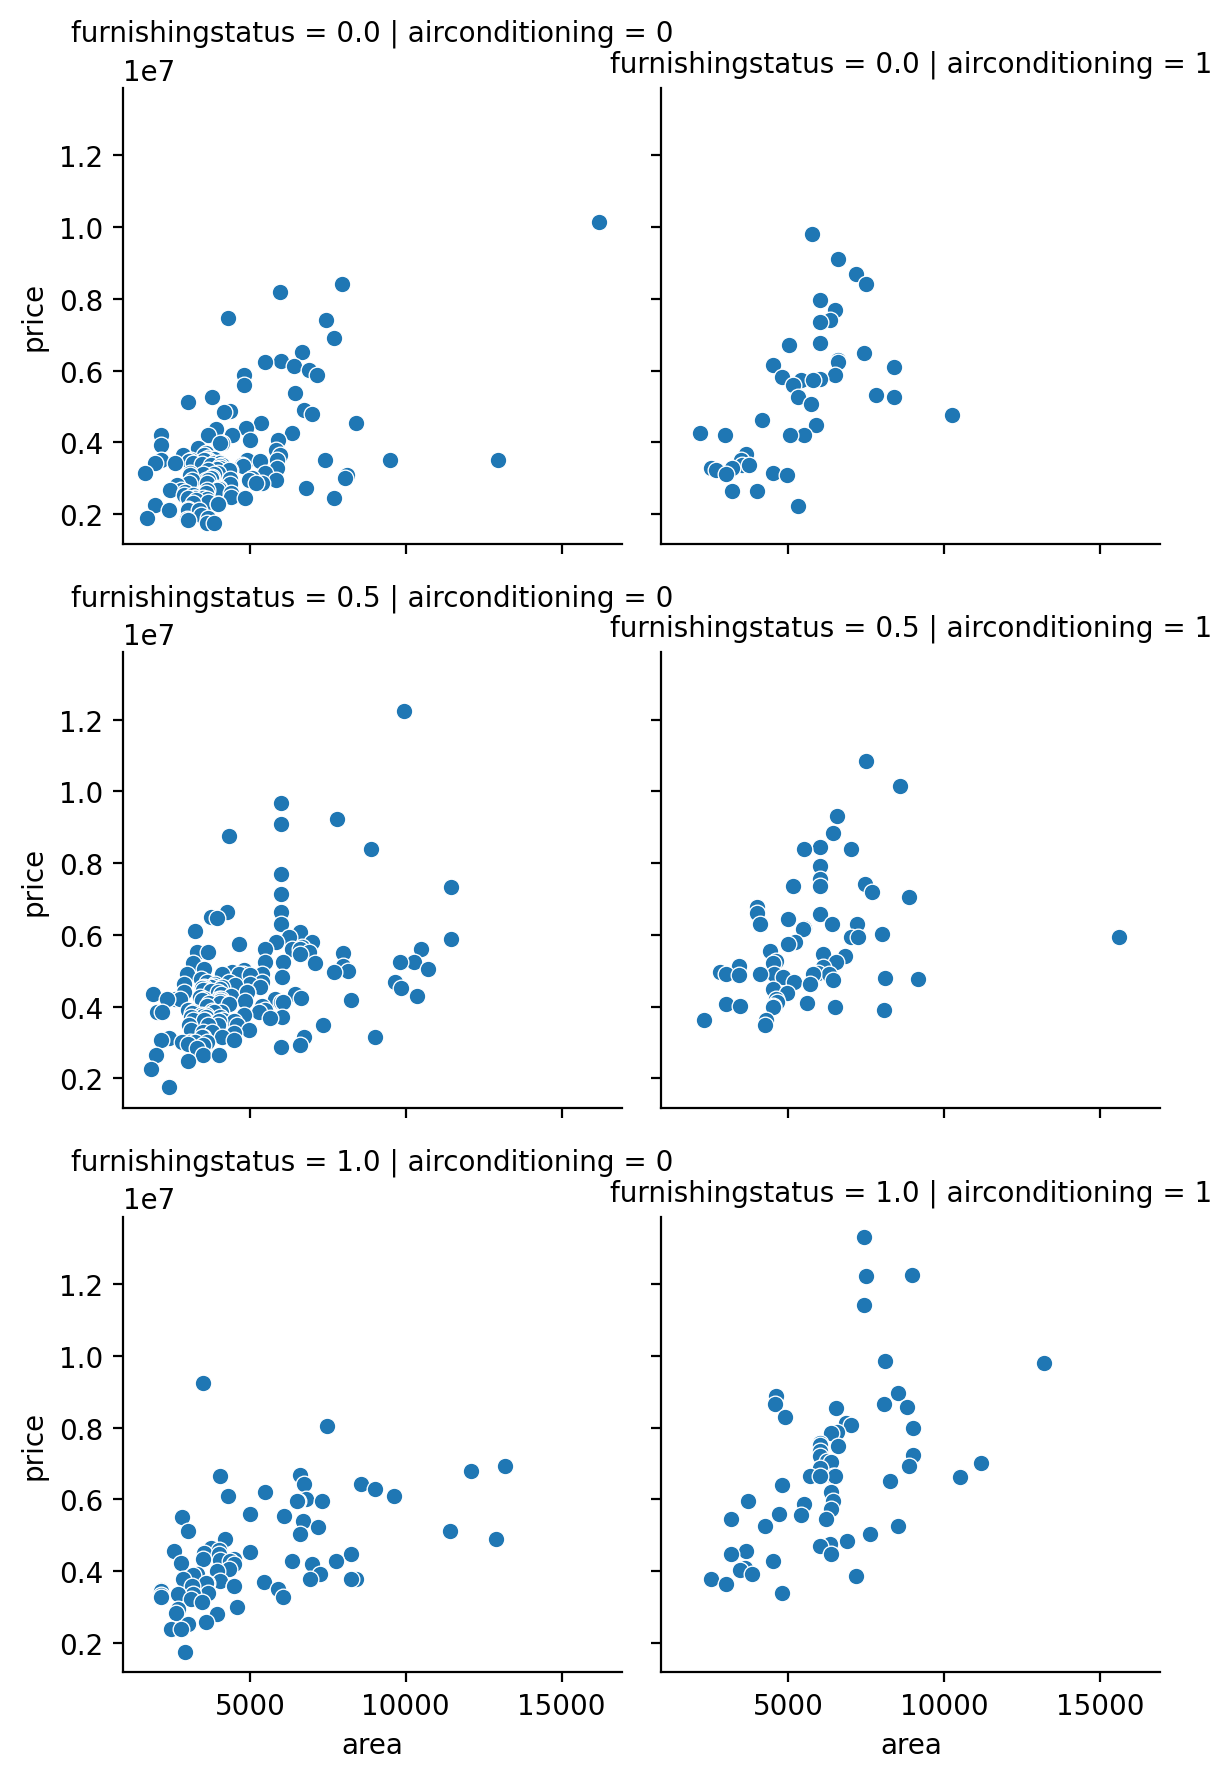

In [46]:
g = sns.FacetGrid(housing_df, row="furnishingstatus",  col="airconditioning")
g.map(sns.scatterplot, "area", "price")


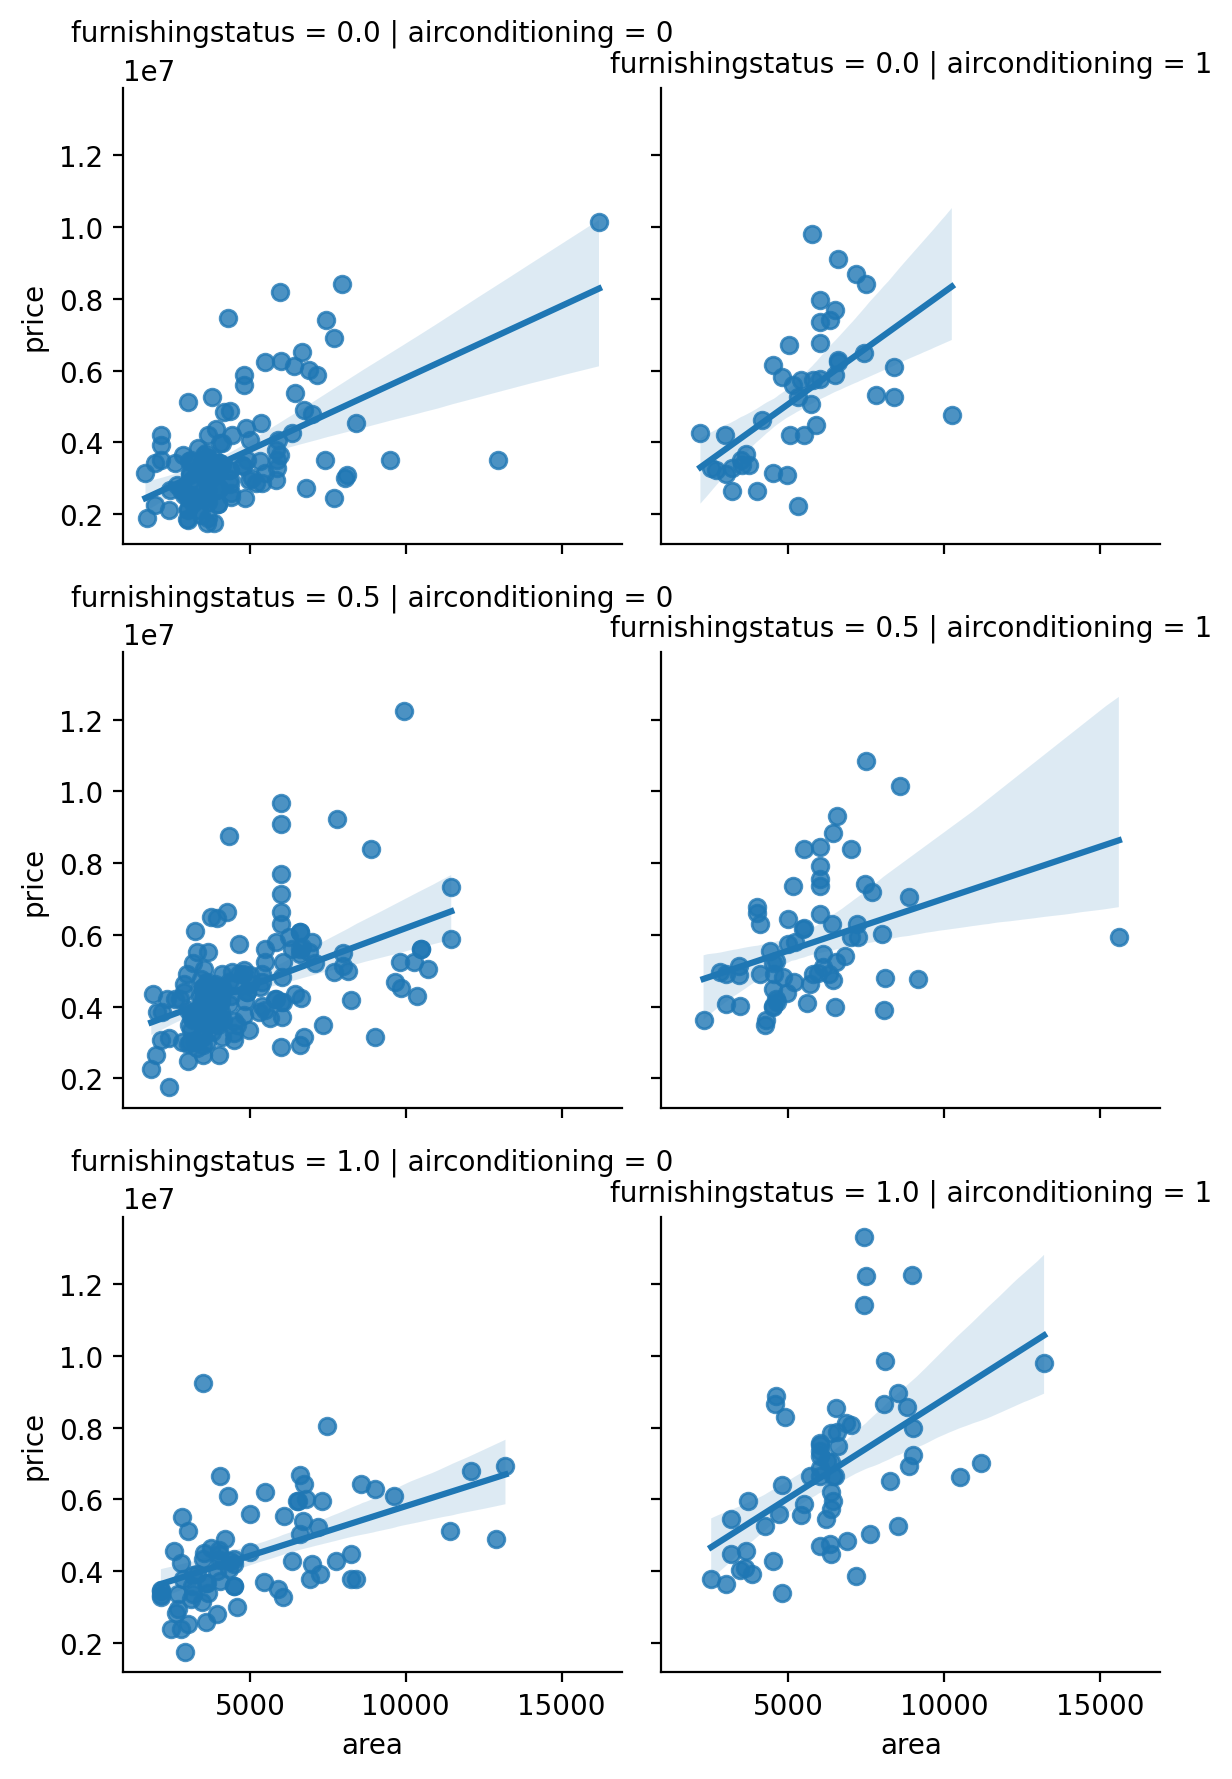

In [47]:
g = sns.FacetGrid(housing_df, row="furnishingstatus",  col="airconditioning")
g.map(sns.regplot, "area", "price")

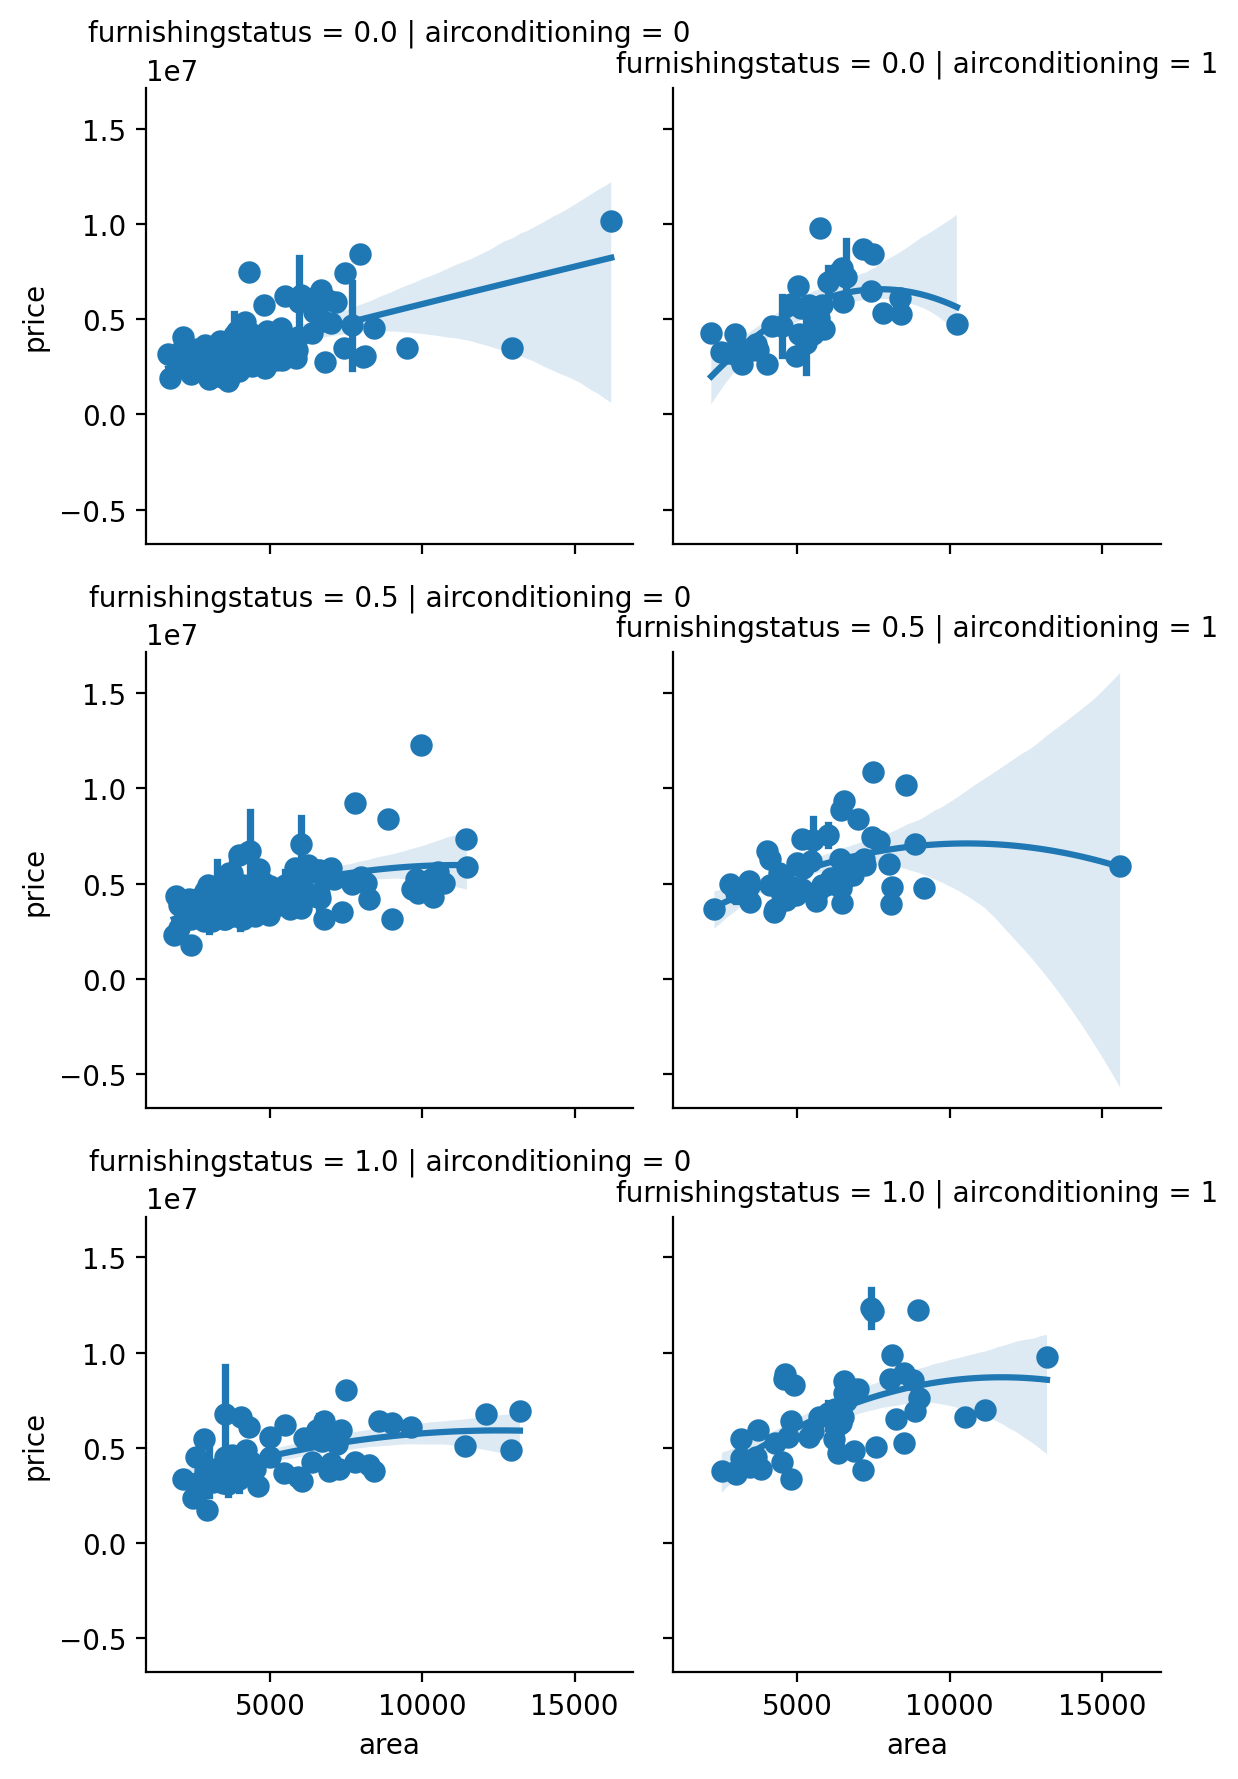

In [71]:
import numpy as np
g = sns.FacetGrid(housing_df, row="furnishingstatus",  col="airconditioning")
g.map(sns.regplot, "area", "price", order=2,x_estimator=np.mean)

<Axes: >

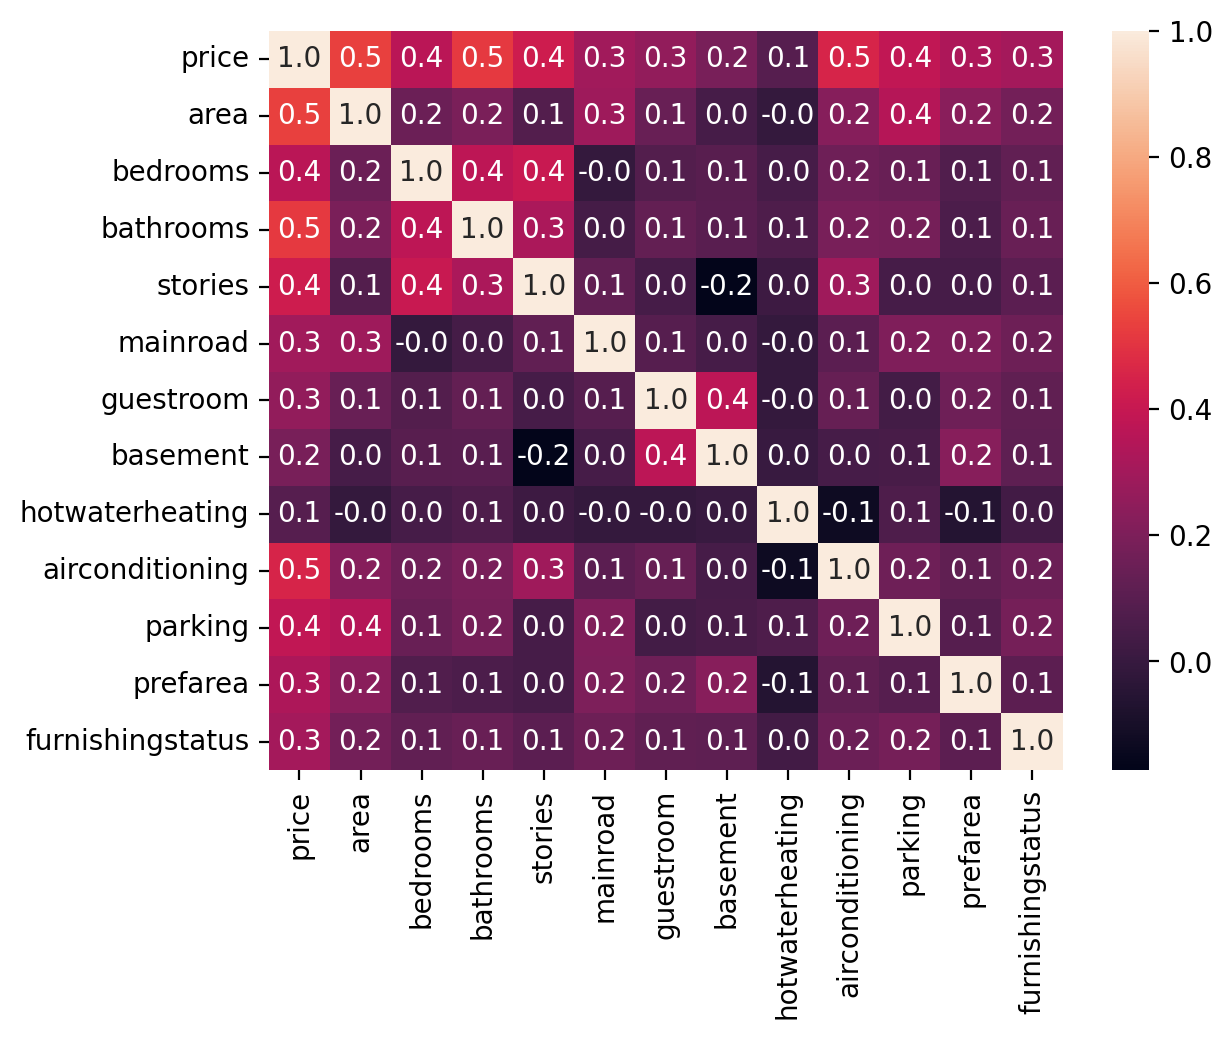

In [86]:
# Compute the correlation matrix
correlation_matrix = housing_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")


In [80]:
important_df = housing_df.loc[:,["price", "area", "bathrooms", "airconditioning"]]
important_df

,price,area,bathrooms,airconditioning
0,13300000,7420,2,1
1,12250000,8960,4,1
2,12250000,9960,2,0
3,12215000,7500,2,1
4,11410000,7420,1,1
...,...,...,...,...
540,1820000,3000,1,0
541,1767150,2400,1,0
542,1750000,3620,1,0
543,1750000,2910,1,0


<Axes: xlabel='price', ylabel='Count'>

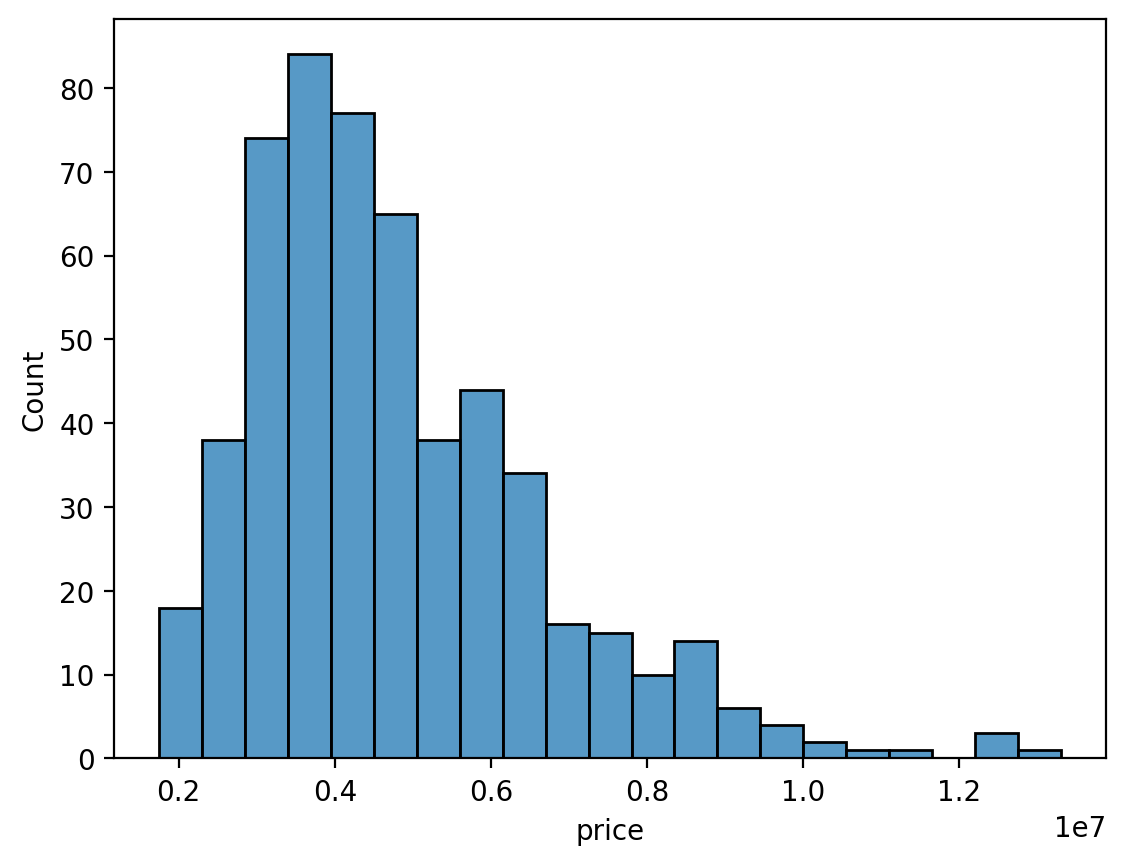

In [56]:
sns.histplot(housing_df, x="price")

<Axes: xlabel='price', ylabel='Probability'>

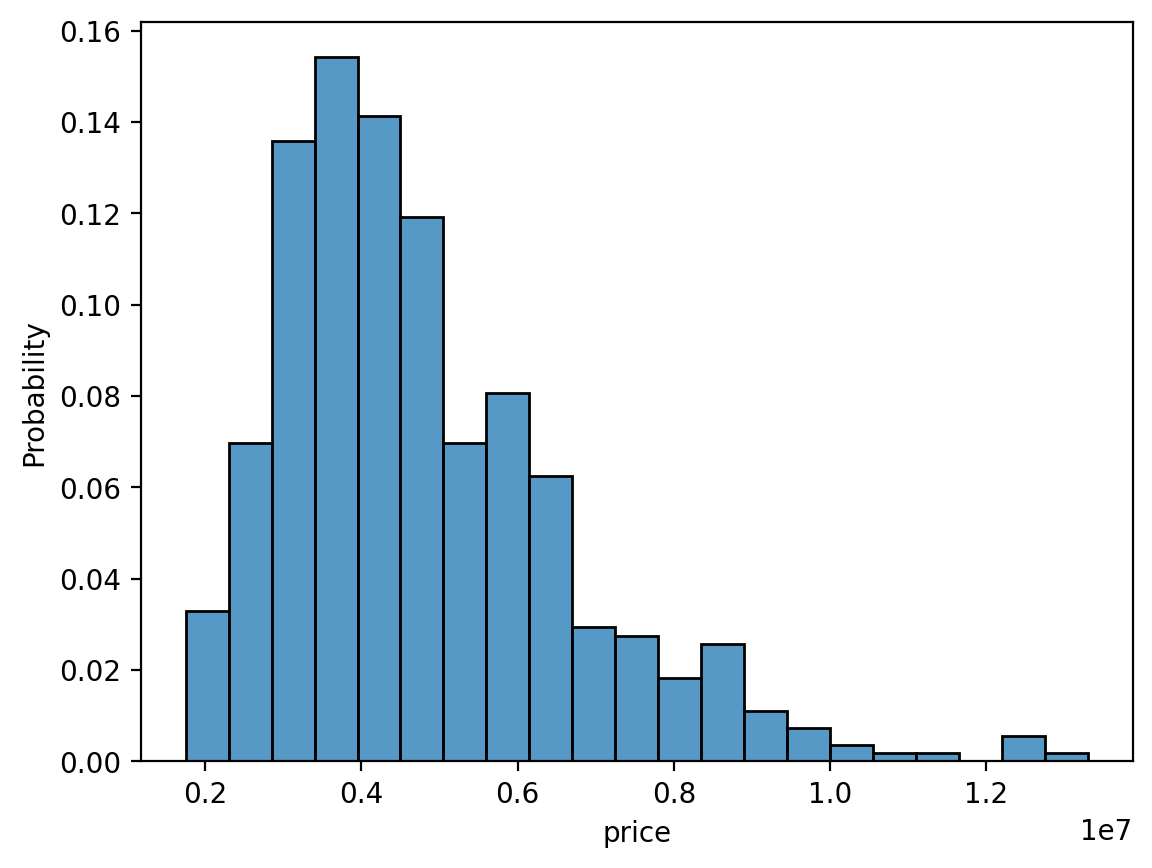

In [57]:
sns.histplot(housing_df, x="price", stat="probability")

<Axes: xlabel='price', ylabel='Probability'>

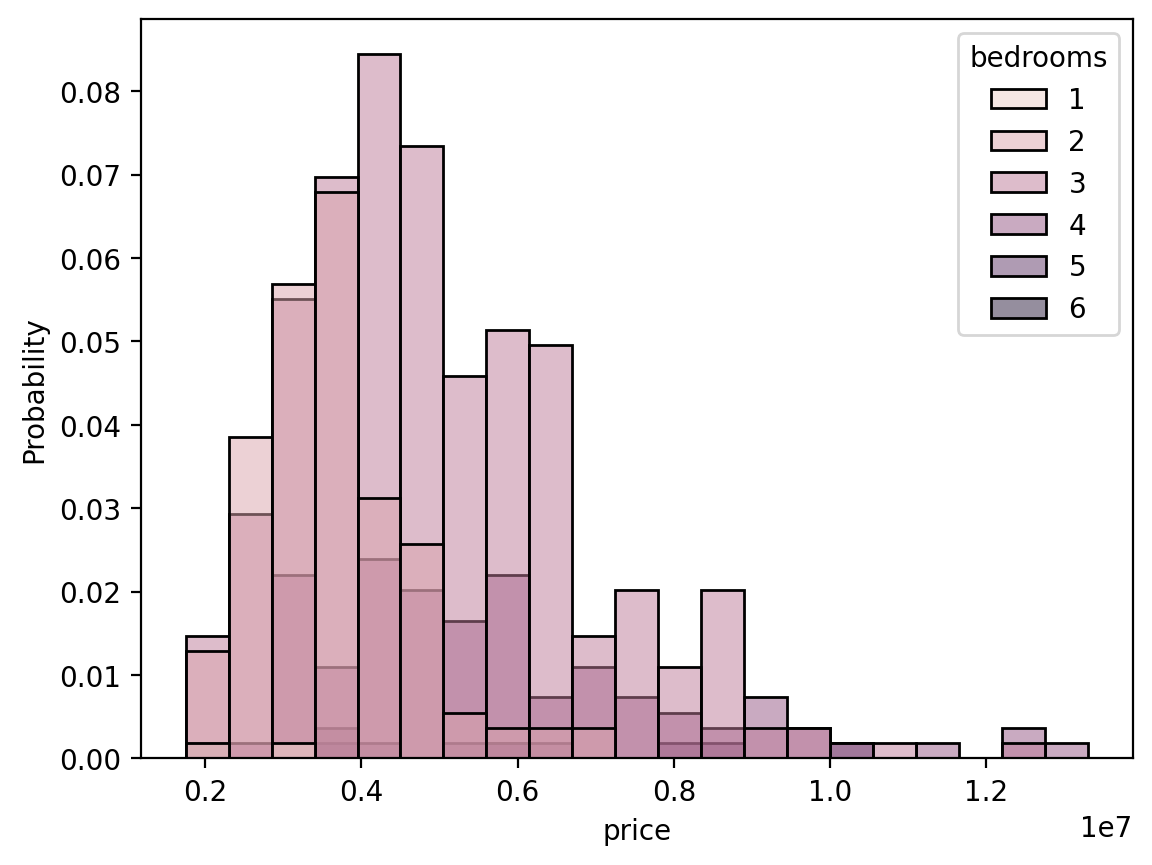

In [59]:
sns.histplot(housing_df, x="price", hue="bedrooms", stat="probability")

<Axes: xlabel='price', ylabel='Probability'>

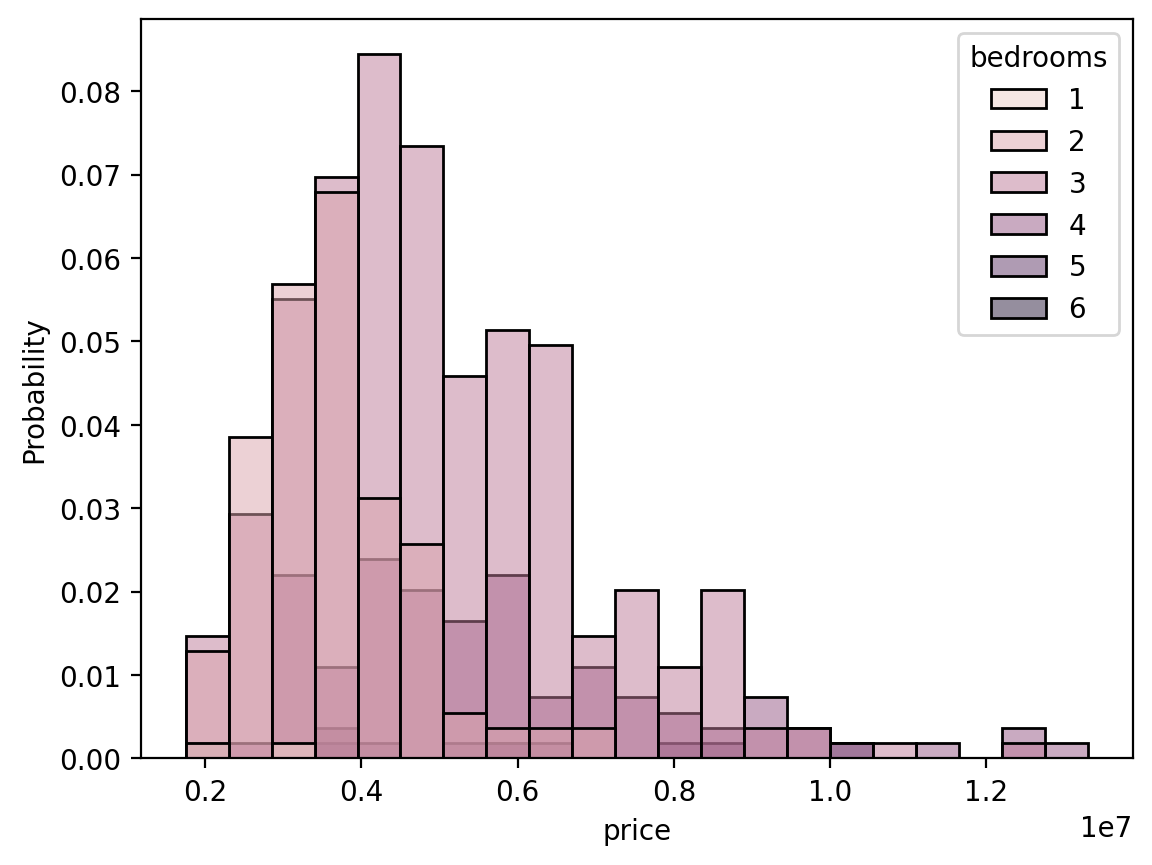

In [60]:
sns.histplot(housing_df, x="price", hue="bedrooms", stat="probability")

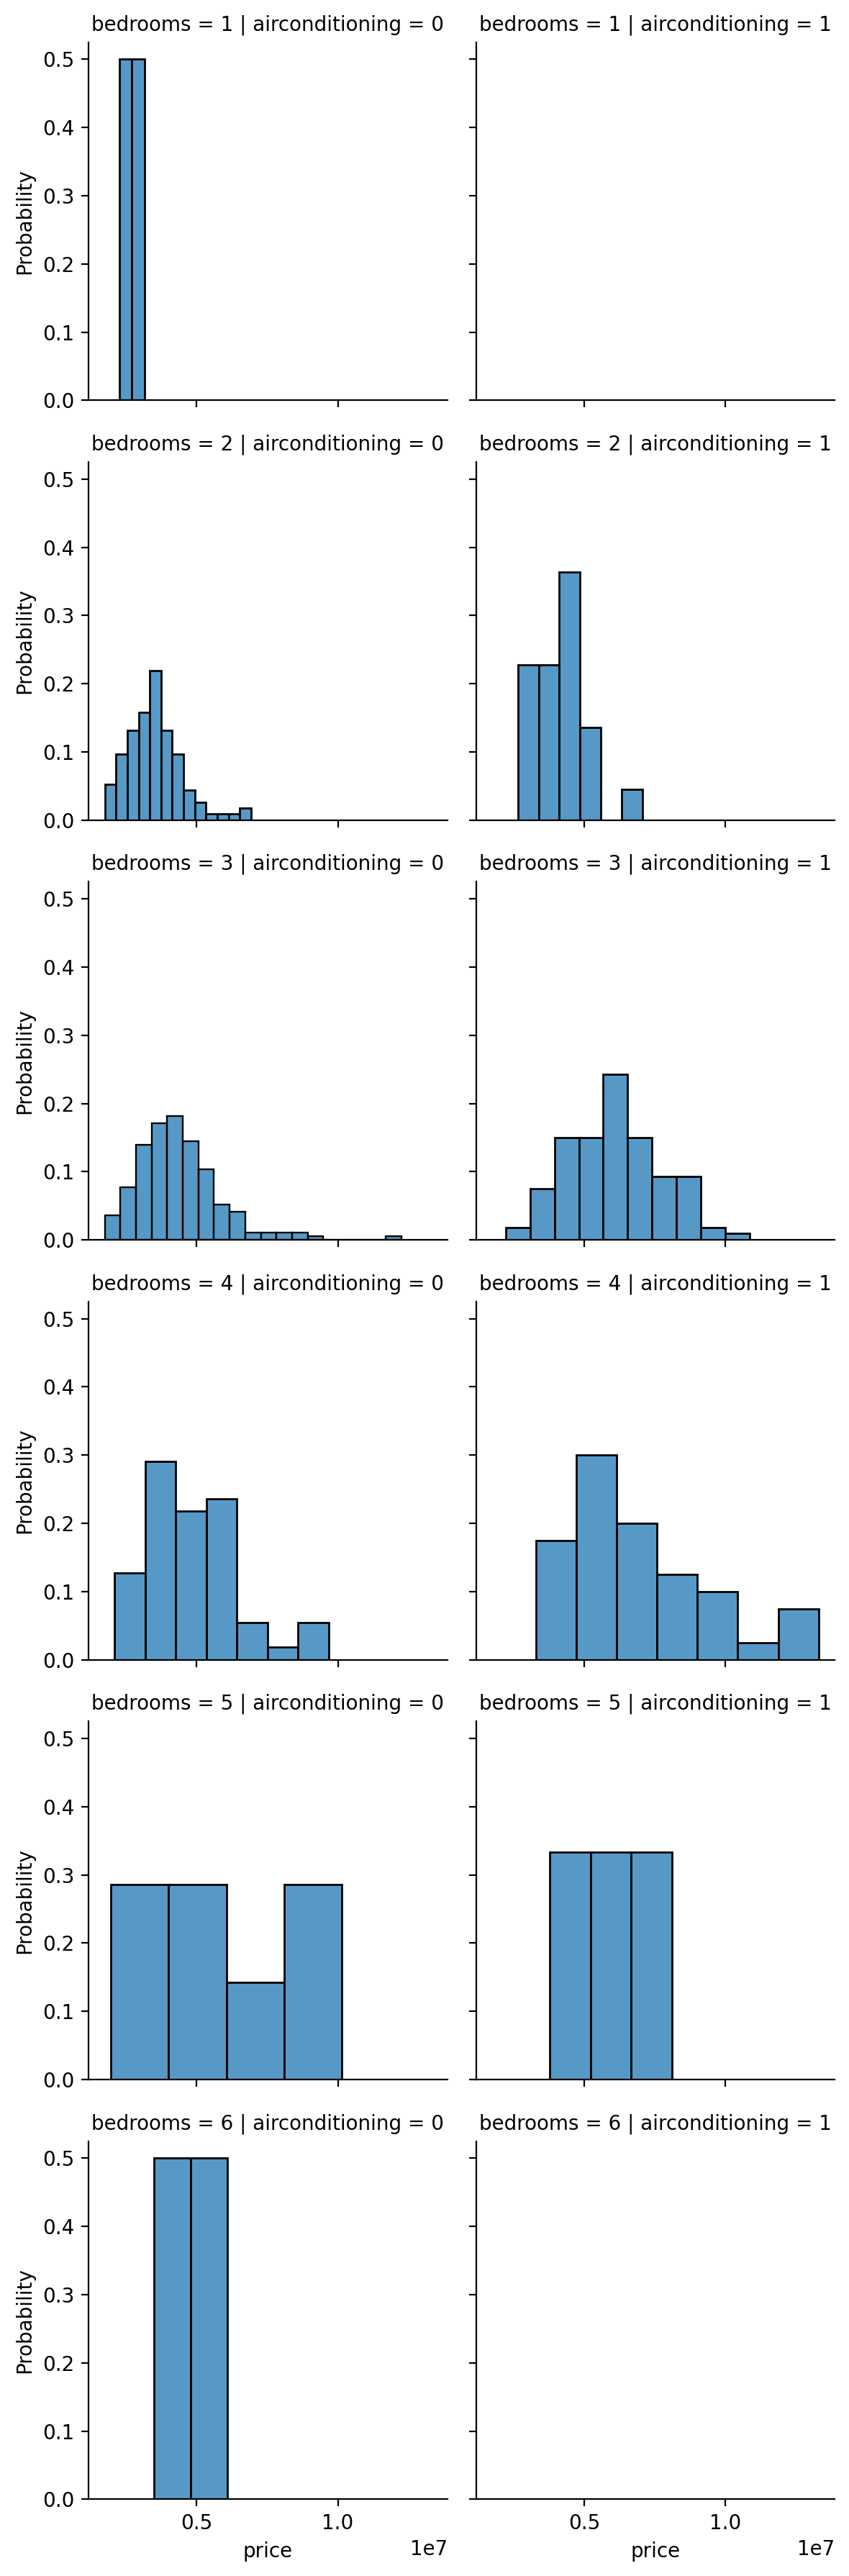

In [63]:
g = sns.FacetGrid(housing_df, row="bedrooms", col = "airconditioning")
g.map(sns.histplot, "price", stat="probability")

In [ ]:
g = sns.FacetGrid(housing_df, row="bedrooms", col="airc)
g.map(sns.histplot, "price", stat="probability")

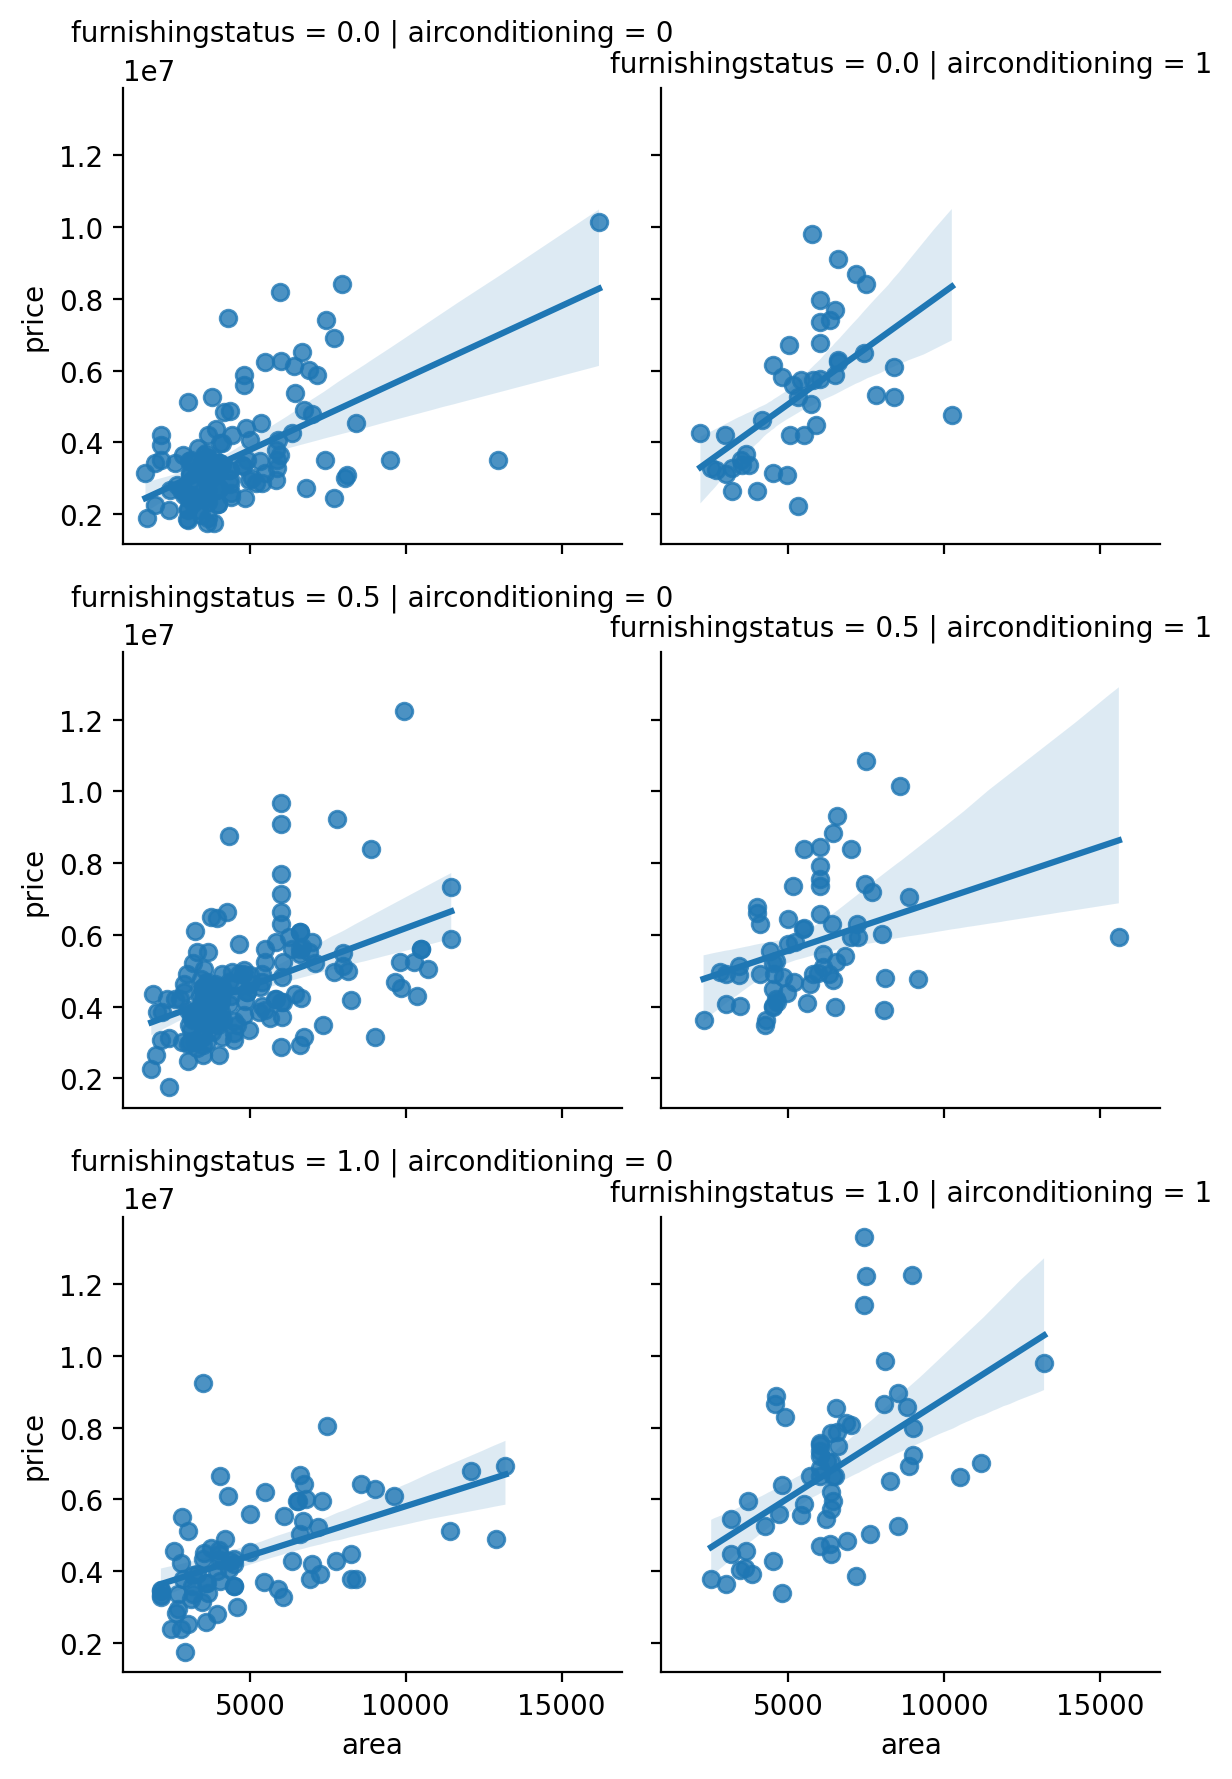

In [73]:
g = sns.FacetGrid(housing_df, row="furnishingstatus",  col="airconditioning")
g.map(sns.regplot, "area", "price")

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming the DataFrame is called 'df'
X = housing_df[['area', 'bathrooms', 'airconditioning']]
y = housing_df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the linear regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 1228450.9803546113
Mean Squared Error: 2539887537221.1377


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

# Scatter plot of Real vs Predicted values
plt.figure(figsize=(10,6)) 
sns.scatterplot(x='Real', y='Predicted', data=results_df)

<Axes: xlabel='price', ylabel='Count'>

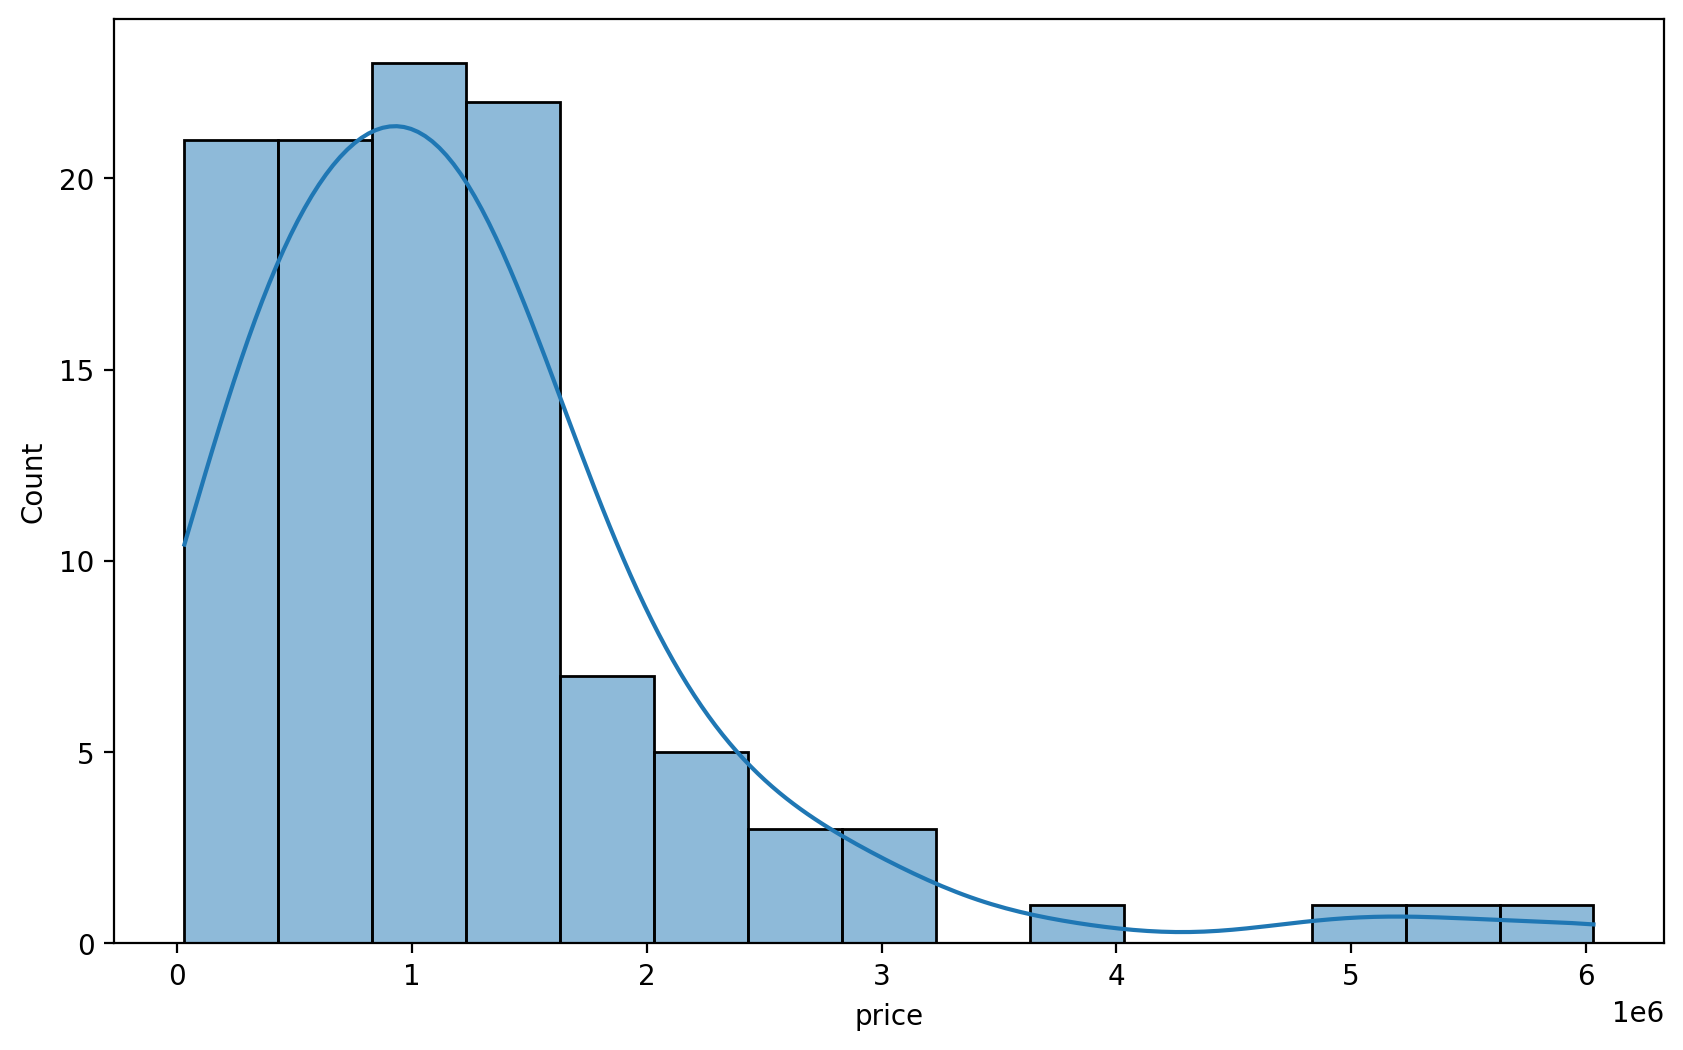

In [99]:
# Residuals plot (difference between Real and Predicted)
plt.figure(figsize=(10,6))
residuals = np.abs(y_test - y_pred)
sns.histplot(residuals, kde=True)

In [88]:
from sklearn.metrics import r2_score
# Coefficients (Slopes)
coefficients = model_lr.coef_
features = X.columns
for feature, coef in zip(features, coefficients):
    print(f"Coefficient for {feature}: {coef}")

# Intercept (Bias)
intercept = model_lr.intercept_
print(f"Intercept: {intercept}")

# Model performance (R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Predictions vs Actual
predictions_df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
print(predictions_df.head())

Coefficient for area: 311.5935145301951
Coefficient for bathrooms: 1437115.651032697
Coefficient for airconditioning: 1155757.288048447
Intercept: 925852.0573958796
R-squared: 0.4975067288756453
        Real     Predicted
316  4060000  5.638485e+06
77   6650000  6.981198e+06
360  3710000  3.621806e+06
90   6440000  5.076693e+06
493  2800000  3.596878e+06


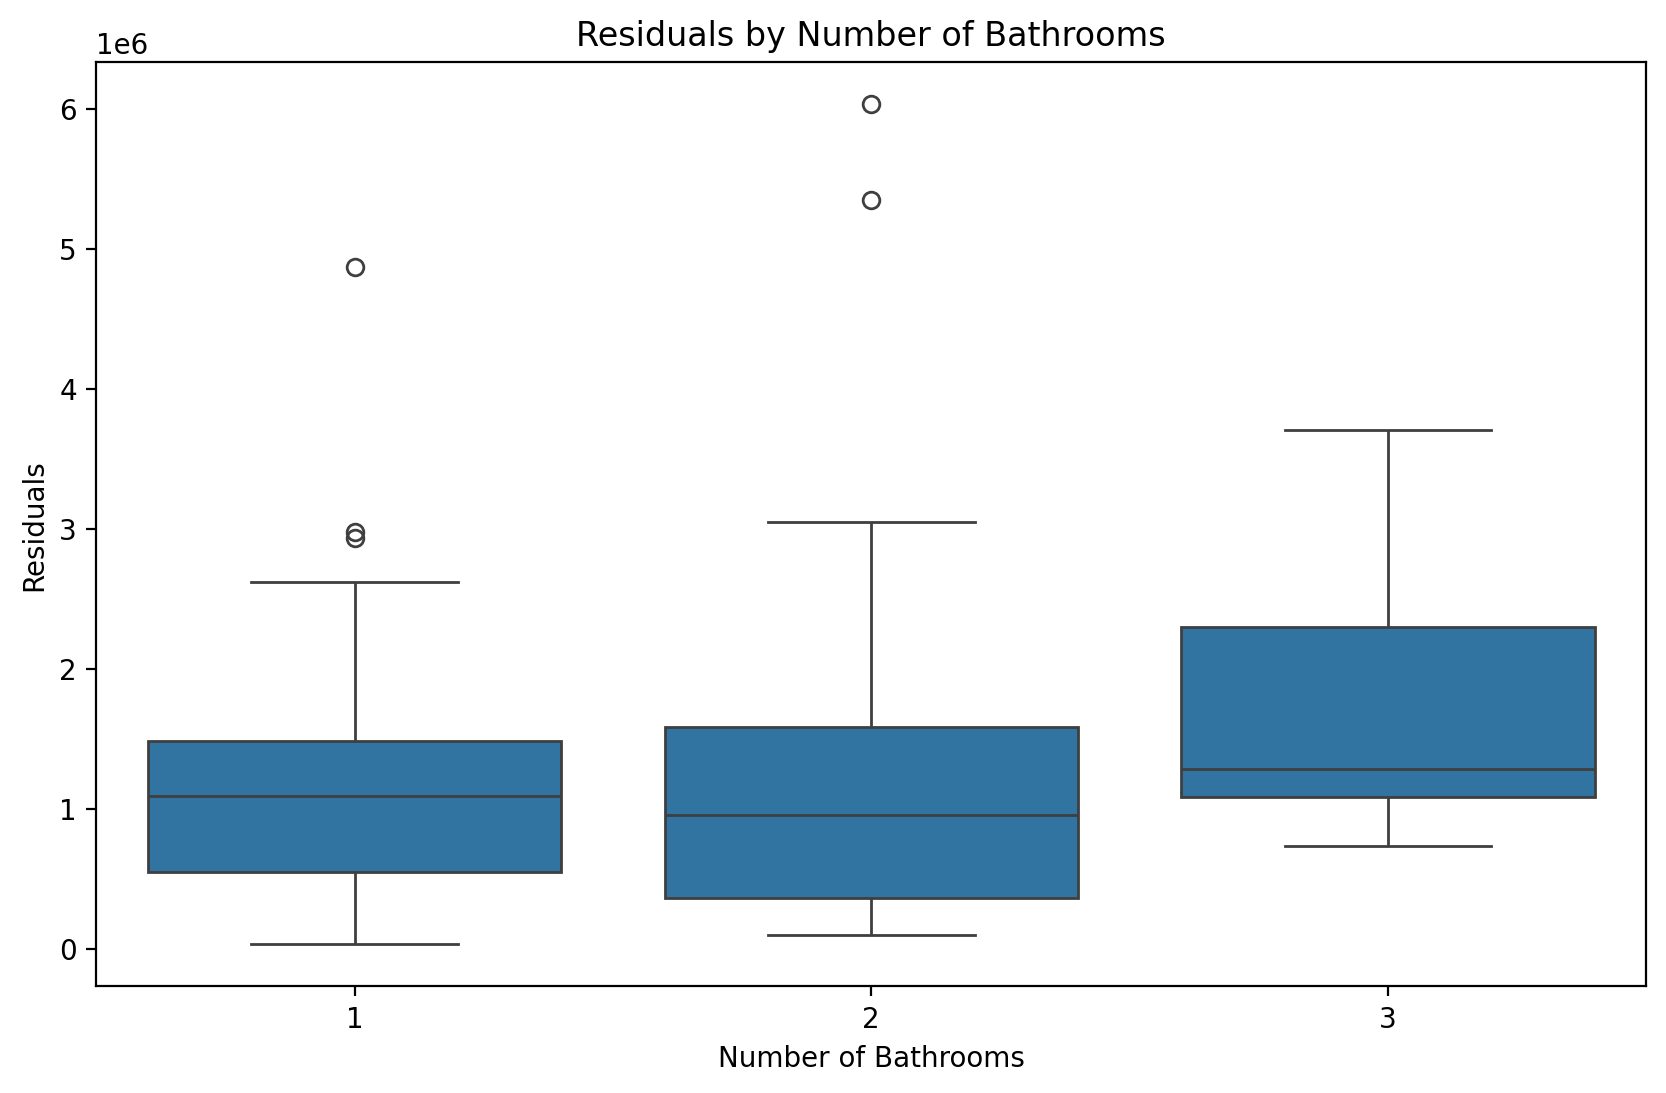

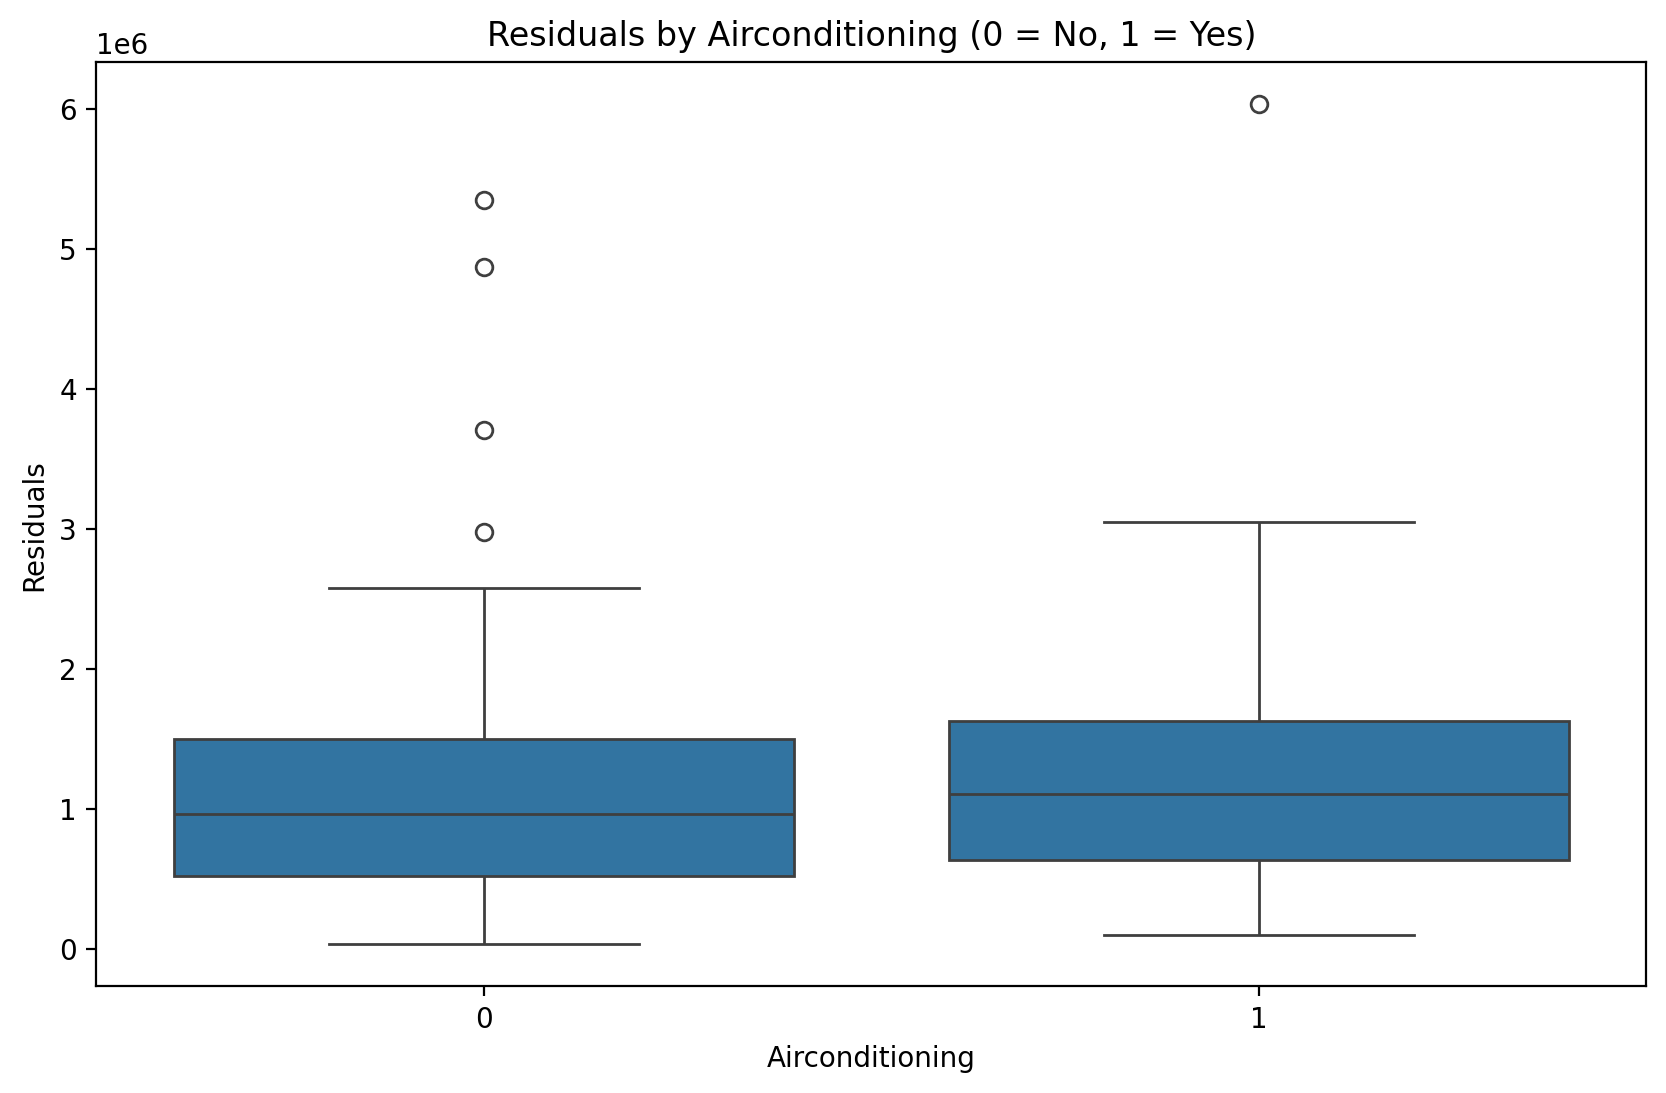

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals (Real - Predicted)
residuals = np.abs(y_test - y_pred)

# Create a DataFrame with residuals and features
residuals_df = pd.DataFrame({
    'Residuals': residuals, 
    'Area': X_test['area'], 
    'Bathrooms': X_test['bathrooms'], 
    'Airconditioning': X_test['airconditioning']
})

# Boxplot: Residuals by Bathrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='Bathrooms', y='Residuals', data=residuals_df)
plt.title('Residuals by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Residuals')
plt.show()

# Boxplot: Residuals by Airconditioning
plt.figure(figsize=(10,6))
sns.boxplot(x='Airconditioning', y='Residuals', data=residuals_df)
plt.title('Residuals by Airconditioning (0 = No, 1 = Yes)')
plt.xlabel('Airconditioning')
plt.ylabel('Residuals')
plt.show()# Plot Residuals vs Area
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area', y='Residuals', data=residuals_df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Area')
plt.show()

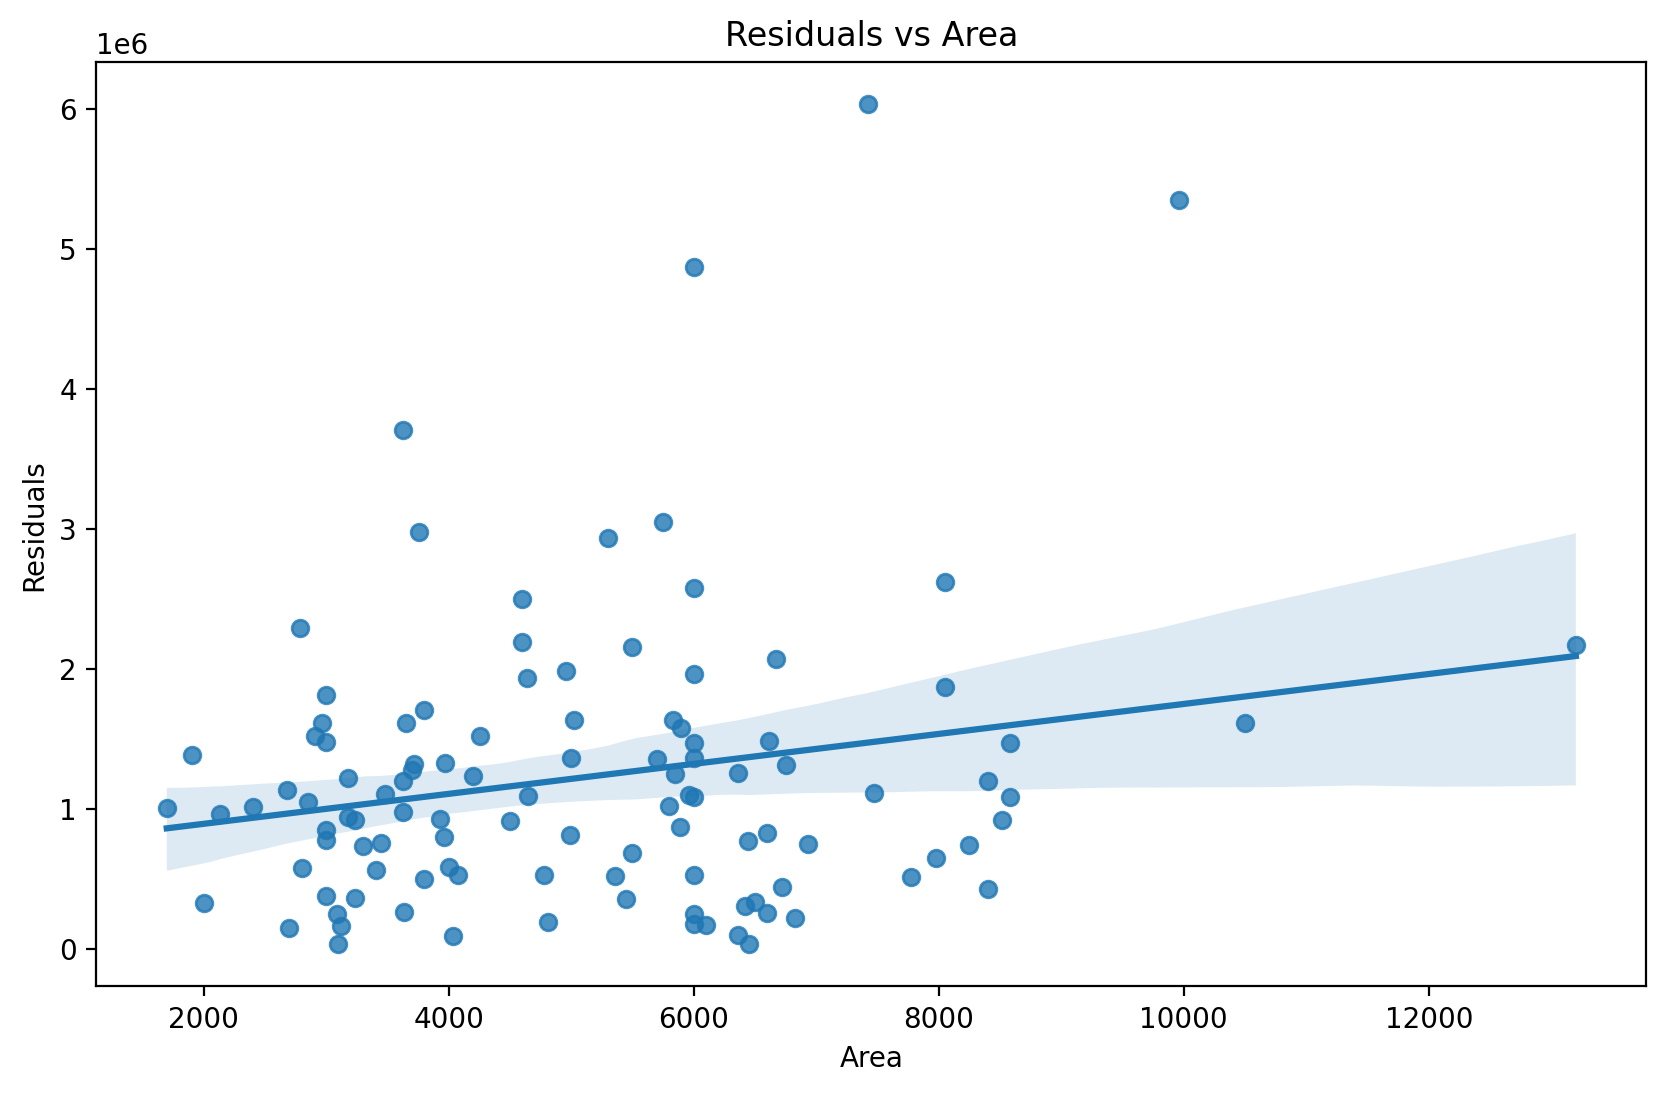

In [95]:
# Plot Residuals vs Area
plt.figure(figsize=(10,6))
sns.regplot(x='Area', y='Residuals', data=residuals_df)
plt.title('Residuals vs Area')
plt.show()